In [1]:

!git clone https://github.com/fredericoaraujopt/section_identification.git
%cd section_identification

!pip install -r requirements.txt


Cloning into 'section_identification'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 311 (delta 22), reused 29 (delta 11), pack-reused 265 (from 1)
Receiving objects: 100% (311/311), 770.03 MiB | 17.08 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Updating files: 100% (35/35), done.
/content/section_identification
Obtaining file:///content/section_identification (from -r requirements.txt (line 1))
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of section-identification to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement ipyeventsipythononnxruntimeopencv_pythonpycocotoolsopencv-python (from section-identification) (from versions: none)
ERROR: No matching distribution found for ipyeventsipythononnxruntimeopencv_pythonpycocotoolsopencv-python


In [2]:
!pip install matplotlib scikit-image numpy opencv-python pandas scikit-learn torch tqdm ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitli

In [4]:
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything
!pip install -e .

!pip install pycocotools

%cd /content/section_identification


Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/section_identification/section_identification/segment-anything
Obtaining file:///content/section_identification/section_identification/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment_anything
/content/section_identification


In [3]:
!git clone https://github.com/fredericoaraujopt/section_identification.git
%cd section_identification

fatal: destination path 'section_identification' already exists and is not an empty directory.
/content/section_identification/section_identification


In [9]:
!pip install matplotlib scikit-image numpy opencv-python pandas scikit-learn torch tqdm pycocotools ortools


In [7]:
%cd /content
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything
!pip install -e .


/content
Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 16.62 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Attempting uninstall: segment_anything
    Found existing installation: segment_anything 1.0
    Uninstalling segment_anything-1.0:
      Successfully uninstalled segment_anything-1.0
  Running setup.py develop for segment_anything


In [5]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O sam_vit_h_4b8939.pth


--2025-06-03 14:06:19--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.102, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   218MB/s    in 12s     

2025-06-03 14:06:31 (201 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [8]:
import sys
import os
from pathlib import Path


sys.path.append(os.path.abspath("segment-anything"))

sys.path.append(os.path.abspath("."))

from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
print("segment_anything loadin succeed")


segment_anything loadin succeed


In [10]:
import sys
import os
from pathlib import Path

from section_identification.section_detector import automatic_identification

package_path = Path(os.path.abspath(""))
apply_filtering = True

example1 = package_path / "images/example1.png"
example2 = package_path / "images/example2.png"
example3 = package_path / "images/example3.png"
example4 = package_path / "images/example4.png"

# the weights can be downloaded from: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
checkpoint = package_path.parents[0] / "checkpoint/sam_vit_h_4b8939.pth"


In [9]:
automatic_identification(image_path="images/example1.png", checkpoint="checkpoint/sam_vit_h_4b8939.pth")


NameError: name 'automatic_identification' is not defined

In [13]:
# Write filtering=True to only identify sections
masks = automatic_identification(example4, checkpoint=checkpoint, compress=False, apply_filtering=True)
print(f"Number of masks identified: {len(masks)}")

📦 最终模型参数： {'points_per_side': 32, 'pred_iou_thresh': 0.9, 'stability_score_thresh': 0.95, 'min_mask_region_area': 500, 'output_mode': 'binary_mask', 'device': 'cuda'}


FileNotFoundError: [Errno 2] No such file or directory: '/content/segment-anything/images/example4.png'

In [ ]:
from section_identification.interactive import run_sam_interactive

new_masks, stored_masks, fiducials = run_sam_interactive(example4, checkpoint, masks, model_type="vit_h", device="cpu")

Quantized ONNX model already exists: /Users/fredericoaraujo/Documents/section_identification/images/example4_files/example4_onnx_quantized.onnx
[Info] Embedding already exists: /Users/fredericoaraujo/Documents/section_identification/images/example4_files/example4_embedding.npy
Image size: 5000x4999 (width x height), samScale: 0.205
Processing mask 1/6
Processing mask 2/6
Processing mask 3/6
Processing mask 4/6
Processing mask 5/6
Processing mask 6/6
[Info] Starting interactive segmentation. Move the mouse over the image to update mask.


2025-04-09 20:24:12.592 python[32215:15899201] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-09 20:24:12.592 python[32215:15899201] +[IMKInputSession subclass]: chose IMKInputSession_Modern


New mask added at position (2014, 2931, 1)
New mask added at position (2925, 3017, 1)
New mask added at position (2765, 2724, 1)
[Info] Exiting interactive segmentation.


Exported mask coordinates to /Users/fredericoaraujo/Documents/section_identification/images/example4_files/example4_mask_coordinates.csv


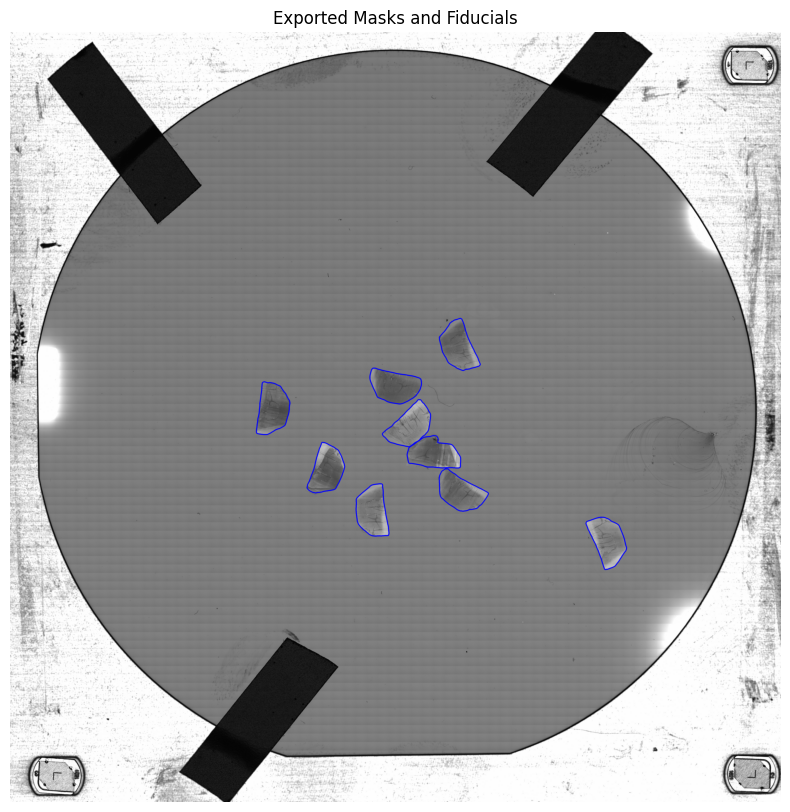

In [ ]:
from section_identification.export import export_mask_coordinates
csv_path = export_mask_coordinates(example4, new_masks, stored_masks, fiducials, visualize=True, sample_points=None)

In [ ]:
from ruler import run_ruler


img_path = "/Users/fredericoaraujo/Documents/force_sensor/Data/Experiment 16/photos/1.png"
calibration_path_075 = "/Users/fredericoaraujo/Documents/force_sensor/Data/Measurements_calibration/0.75.png"
calibration_path_1 = "/Users/fredericoaraujo/Documents/force_sensor/Data/Measurements_calibration/1.0.png"
calibration_path_125 = "/Users/fredericoaraujo/Documents/force_sensor/Data/Measurements_calibration/1.25.png"
calibration_path_1_new = "/Users/fredericoaraujo/Documents/force_sensor/Data/Measurements_calibration/1.0_new.png"

magnification = 0.75  # e.g. 0.75x
original_length_mm = 7.595  # Original reference length in mm
measurements = run_ruler(img_path, magnification, original_length_mm)
print("Final Measurements:")
for meas in measurements:
    print(meas)

[Debug] Using calibrated scale: effective_pixels_per_mm = 93.96, conversion_factor = 0.010643 mm/pixel
[Info] Exiting ruler interface.
Final Measurements:
((611, 287), (1266, 391), 7.058376931483896, 0.9293452181018955)
((694, 604), (984, 670), 3.1653419990185934, 0.41676655681614133)
((592, 374), (1229, 552), 7.039190061211528, 0.926818967901452)


In [ ]:
from section_identification.thesis import export_contour_image
export_contour_image(csv_path, example2)

Exported image with contours to /Users/fredericoaraujo/Documents/section_identification/images/example2_files/example2_final_drawing.png


'/Users/fredericoaraujo/Documents/section_identification/images/example2_files/example2_final_drawing.png'

In [ ]:
from section_identification.thesis import create_composite_image
# Set your folder paths
folder_before = "/Users/fredericoaraujo/Library/Mobile Documents/com~apple~CloudDocs/Harvard classes/ES 100/Image Library/Section_targeting/before_manual_detector"
folder_after  = "/Users/fredericoaraujo/Library/Mobile Documents/com~apple~CloudDocs/Harvard classes/ES 100/Image Library/Section_targeting/after_manual_detector"

# Create the composite image by calling the function
create_composite_image(folder_before, folder_after, output_filename="my_composite.jpg", max_rows=7)

Composite image saved as my_composite.jpg
